In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [52]:
file_path = 'Global Superstores.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

print(df.head())
print(df.info())


   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816  Technology 

In [53]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [54]:
df = df.drop_duplicates()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [55]:
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])

if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].fillna(0)

In [56]:
print(df.describe())

            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2014-05-11 21:26:49.155780608   
min        1.00000            2012-01-01 00:00:00   
25%    12823.25000            2013-06-19 00:00:00   
50%    25645.50000            2014-07-08 00:00:00   
75%    38467.75000            2015-05-22 00:00:00   
max    51290.00000            2015-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290  51290.000000  51290.000000   
mean   2014-05-15 20:42:42.745174528  10753.999844    246.490581   
min              2012-01-03 00:00:00      0.000000      0.444000   
25%              2013-06-23 00:00:00      0.000000     30.758625   
50%              2014-07-12 00:00:00      0.000000     85.053000   
75%              2015-05-26 00:00:00      0.000000    251.053200   
max              2016-01-07 00:00:00  99301.00

In [57]:
df.nunique()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,0.0,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,0.0,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,0.0,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,0.0,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,0.0,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,0.0,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


# Sales by category and  Top 10 customers by sales

In [64]:
print(df.groupby('Category')['Sales'].sum())
print(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10))


Category
Furniture          4.110452e+06
Office Supplies    3.787493e+06
Technology         4.744557e+06
Name: Sales, dtype: float64
Customer Name
Tom Ashbrook          40488.07080
Tamara Chand          37457.33300
Greg Tran             35550.95428
Christopher Conant    35187.07640
Sean Miller           35170.93296
Bart Watters          32310.44650
Natalie Fritzler      31781.25850
Fred Hopkins          30400.67452
Jane Waco             30288.45030
Hunter Lopez          30243.56658
Name: Sales, dtype: float64


# Sales by Region

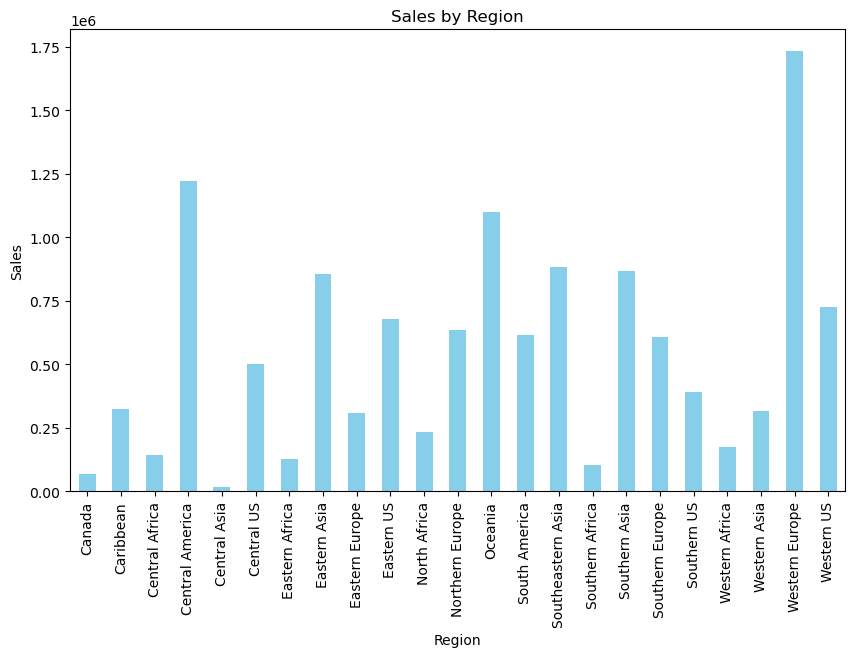

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
df.groupby('Region')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()

# Profit vs Discount

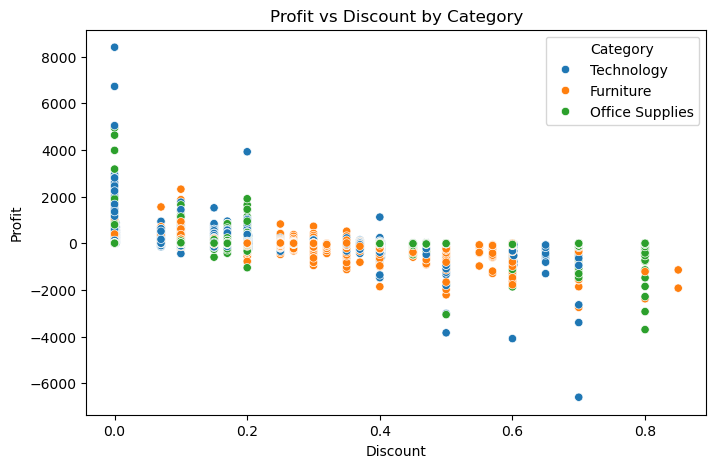

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Profit vs Discount by Category')
plt.show()

# Monthly sales trend

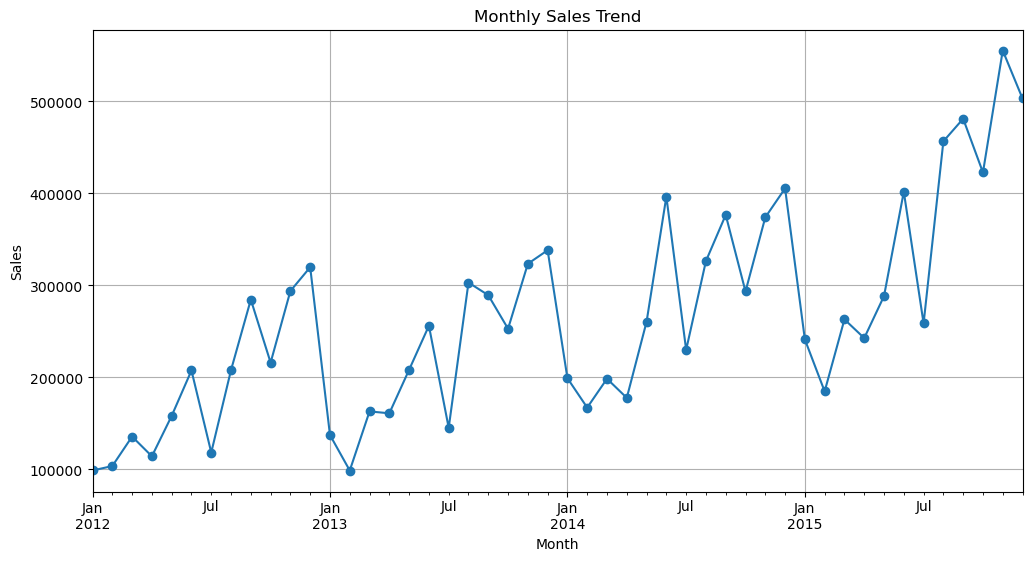

In [74]:
if 'Order Date' in df.columns:
    df['Month'] = df['Order Date'].dt.to_period('M')
    monthly_sales = df.groupby('Month')['Sales'].sum()
    monthly_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Monthly Sales Trend')
    plt.ylabel('Sales')
    plt.xlabel('Month')
    plt.grid(True)
    plt.show()

# Boxplot of Profit by Category

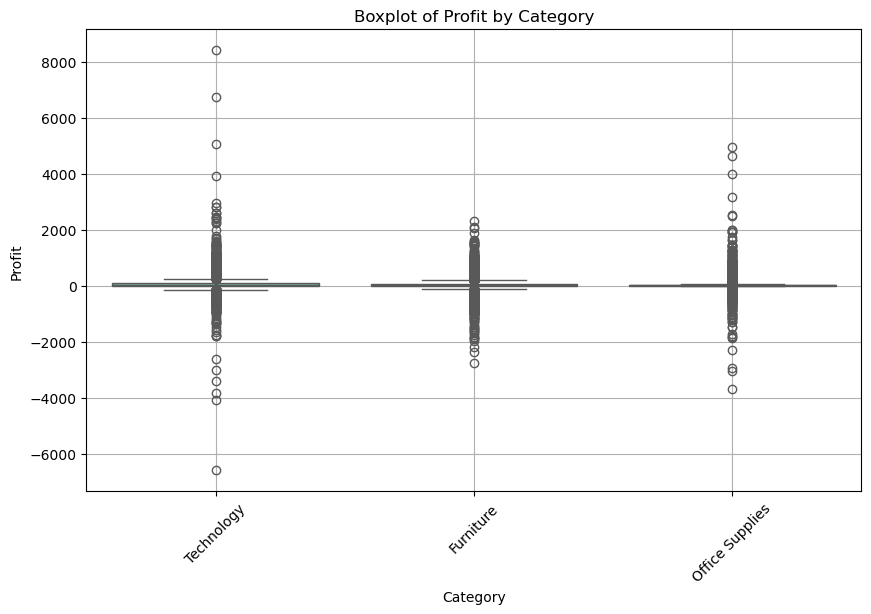

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Profit', palette='Set2')
plt.title('Boxplot of Profit by Category')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Boxplot of Sales by Region

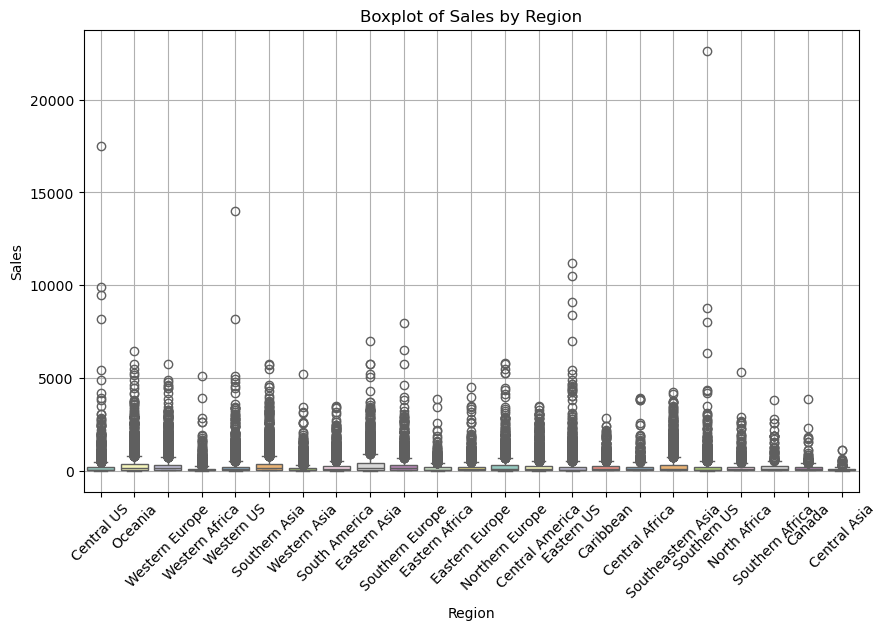

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Sales', palette='Set3')
plt.title('Boxplot of Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Boxplot of Discount by Sub-Category

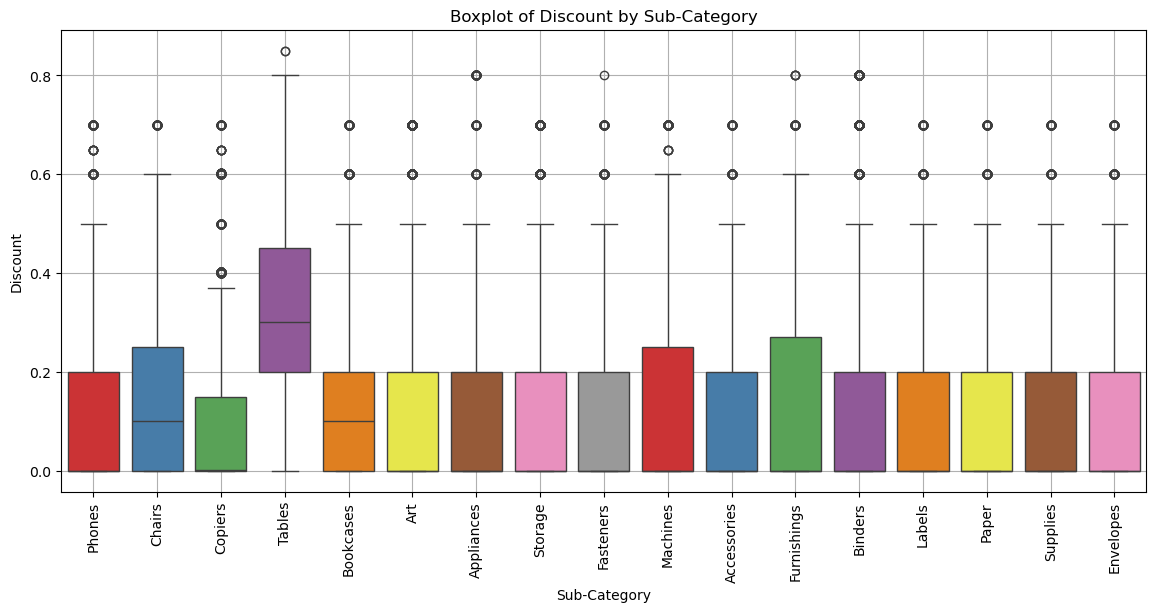

In [87]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Sub-Category', y='Discount', palette='Set1')
plt.title('Boxplot of Discount by Sub-Category')
plt.ylabel('Discount')
plt.xlabel('Sub-Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# What are the top 5 profitable products?

In [77]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier    25199.9280
Cisco Smart Phone, Full Size             17238.5206
Motorola Smart Phone, Full Size          17027.1130
Hoover Stove, Red                        11807.9690
Sauder Classic Bookcase, Traditional     10672.0730
Name: Profit, dtype: float64


# What sub-categories generate loss?

In [80]:
loss_making = df.groupby('Sub-Category')['Profit'].sum().sort_values()
print(loss_making[loss_making < 0])

Sub-Category
Tables   -64083.3887
Name: Profit, dtype: float64


# Save the cleaned data

In [35]:
df.to_excel('Cleaned_Global_Superstores.xlsx', index=False)
